In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [33]:
import pandas as pd
data=pd.read_csv('/kaggle/input/udemy-courses/udemy_courses.csv',parse_dates=['published_timestamp'])
data

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development


In [2]:
dup=data.duplicated().any()
print("duplicated values",dup)

duplicated values True


In [3]:
data=data.drop_duplicates()

In [4]:
dup=data.duplicated().any()
print("duplicated values",dup)

duplicated values False


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
data['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

In [8]:
sns.countplot(data['subject'])

ValueError: could not convert string to float: 'Business Finance'

In [10]:
data['level'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

<Axes: ylabel='count'>

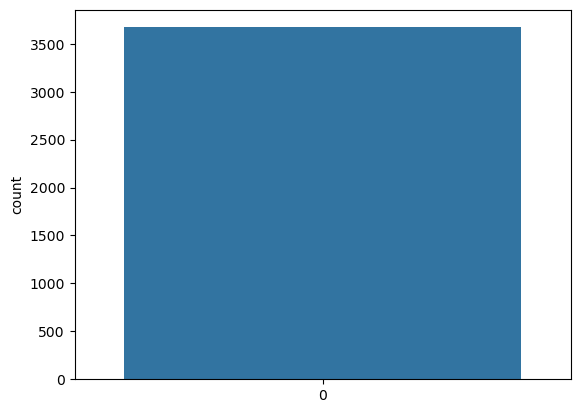

In [14]:
sns.countplot(data['is_paid']=='True')

In [15]:
data.groupby(data['is_paid']).mean()

/tmp/ipykernel_32/38421848.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(data['is_paid']).mean()


,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,,,,,,
False,691446.970968,0.000000,11533.951613,425.929032,21.416129,2.210753
True,674463.946163,72.198096,2421.270077,131.516359,41.866746,4.271584


<Axes: xlabel='is_paid', ylabel='num_subscribers'>

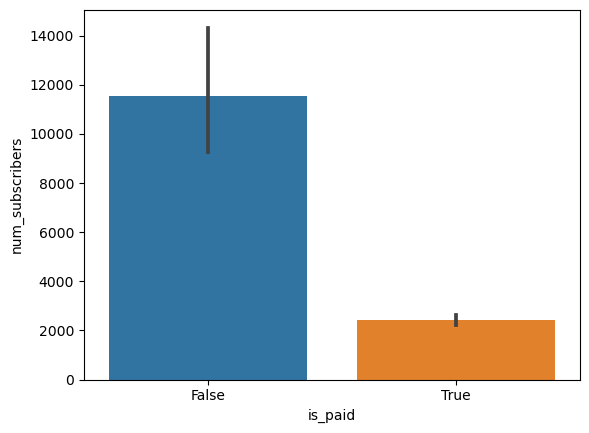

In [16]:
sns.barplot(x="is_paid",y="num_subscribers",data=data)

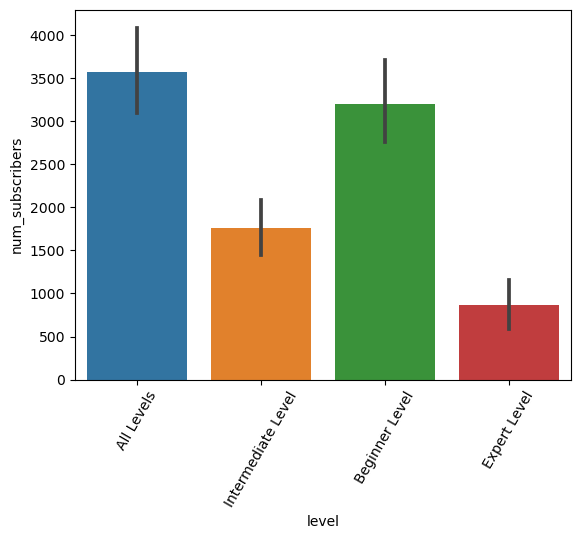

In [19]:
sns.barplot(x="level",y="num_subscribers",data=data)
plt.xticks(rotation=60)
plt.show()

<Axes: xlabel='num_subscribers', ylabel='course_title'>

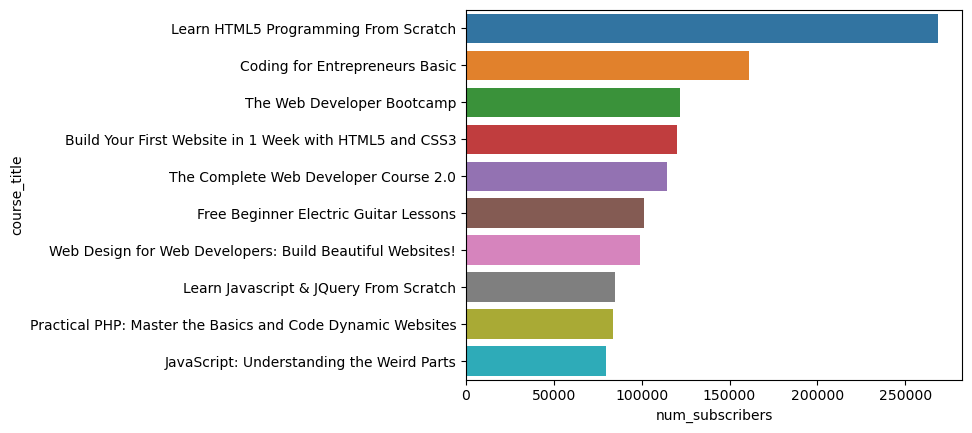

In [20]:
top_10=data.sort_values(by="num_subscribers",ascending=False).head(10)
sns.barplot(x="num_subscribers",y="course_title",data=top_10)

<Axes: xlabel='price', ylabel='num_reviews'>

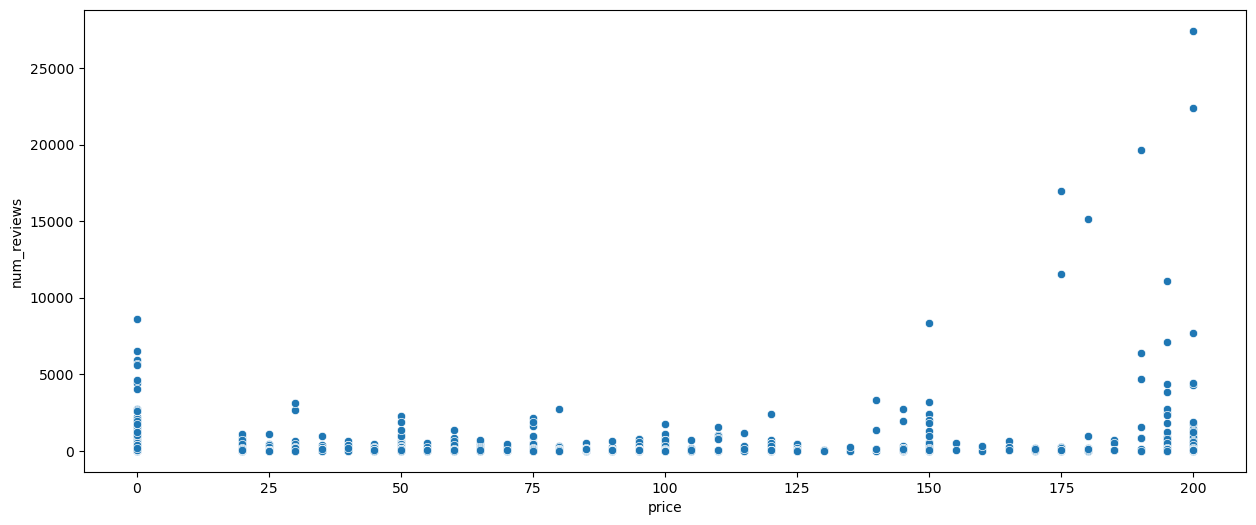

In [22]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="price",y="num_reviews",data=data)

In [27]:
len(data[data['course_title'].str.contains('python',case=False)])

29

In [28]:
python=data[data['course_title'].str.contains('python',case=False)].sort_values(by="num_subscribers",ascending=False)
python

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2497,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4.0,2012-04-25T00:01:43Z,Web Development
2570,47963,"Coding for Entrepreneurs: Learn Python, Django...",https://www.udemy.com/coding-for-entrepreneurs/,True,195,23412,799,251,All Levels,45.0,2013-04-08T00:46:14Z,Web Development
2528,391546,Learn Python and Django: Payment Processing,https://www.udemy.com/learn-django-code-accept...,True,70,17714,198,23,All Levels,3.5,2015-02-09T15:37:56Z,Web Development
3200,822444,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,True,200,11832,1883,191,All Levels,31.5,2017-02-24T18:40:55Z,Web Development
3507,394832,Fun and creative web engineering with Python a...,https://www.udemy.com/web-engineering-with-pyt...,False,0,10917,319,25,All Levels,2.0,2015-06-09T19:51:50Z,Web Development
2553,938560,The Complete Ethical Hacking Course 2.0: Pytho...,https://www.udemy.com/penetration-testing-ethi...,True,195,7827,268,66,All Levels,11.0,2016-09-26T15:08:29Z,Web Development
3138,631128,Complete Python Web Course: Build 8 Python Web...,https://www.udemy.com/the-complete-python-web-...,True,110,7489,941,173,All Levels,16.0,2015-11-08T20:57:35Z,Web Development
3197,76052,Try Django 1.9 | Build a Blog and Learn Python...,https://www.udemy.com/try-django/,True,50,7407,172,147,All Levels,20.0,2014-03-04T07:12:21Z,Web Development
2681,477702,Python for Beginners: Python Programming Langu...,https://www.udemy.com/python-course/,True,150,6153,125,84,Beginner Level,5.0,2015-06-14T18:18:57Z,Web Development
3203,970600,REST APIs with Flask and Python,https://www.udemy.com/rest-api-flask-and-python/,True,110,5151,737,115,Intermediate Level,12.5,2016-11-06T19:00:38Z,Web Development


<Axes: xlabel='num_subscribers', ylabel='course_title'>

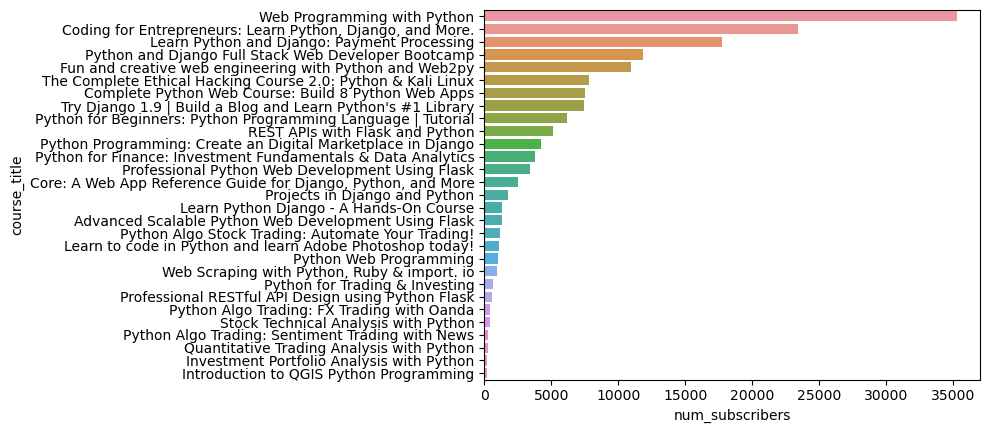

In [29]:
sns.barplot(x="num_subscribers",y="course_title",data=python)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

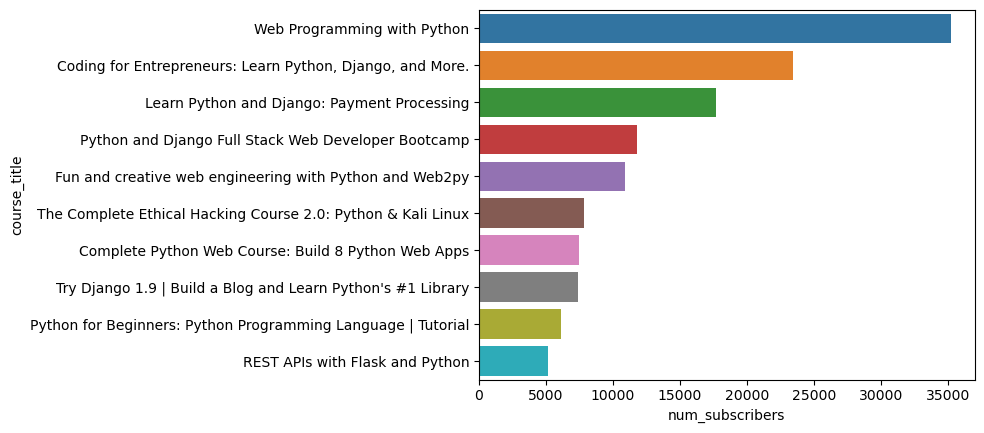

In [31]:
python=data[data['course_title'].str.contains('python',case=False)].sort_values(by="num_subscribers",ascending=False).head(10)
sns.barplot(x="num_subscribers",y="course_title",data=python)

In [35]:
data['Year']=data['published_timestamp'].dt.year
data.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017


<Axes: xlabel='Year', ylabel='num_subscribers'>

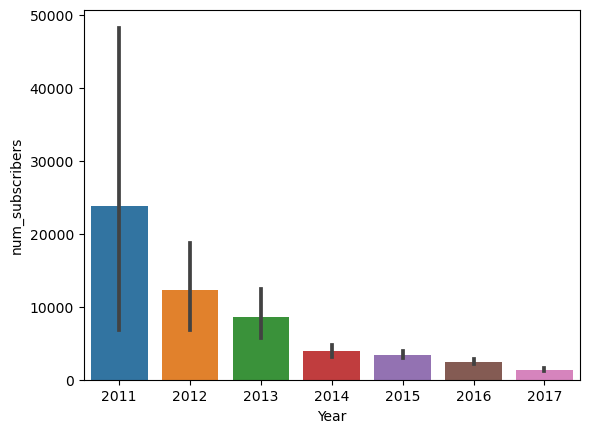

In [40]:
sns.barplot(x='Year',y='num_subscribers',data=data)

In [42]:
data.groupby('Year')['subject'].value_counts()

Year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         56
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          66
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       349
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       225
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: subject, dtype: int64